In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# import DATA

## Part detail
Part_DF = pd.read_csv('Parts.csv')
Part_DF.name = 'Parts'

## Order detail
Order_DF = pd.read_csv('Order.csv')
Order_DF.name = 'Order'

## Focus lists
Focus_WC = ['WC002', 'WC013', 'WC015','WC020', 'WC026', 'WC030']
Focus_Part = ['PN 54264', 'PN 59653', 'PN 60234', 'PN 53784', 'PN 54040']

In [3]:
# define custom function

def Check_Data(df) :
    print('')   # empty line spacer
    print('CHECK DATA - ' + df.name + ' DataFrame')  # Check Data heading
    print(type(df))
    print(df.head())  # show first rows of data
    print(df.dtypes)    # show data types
    print(df.shape)   # show overall size of DataFrame
    print(df.isnull().sum())  # is there any empty data fields  
    return 

In [4]:
# examine imported data
Check_Data(Part_DF)
Check_Data(Order_DF)


CHECK DATA - Parts DataFrame
<class 'pandas.core.frame.DataFrame'>
       Part ProcType Business Area Production Area  Planner    Buyer  \
0  PN 51396      Buy        BA 001       PROD 1001      NaN  BYR 006   
1  PN 62167      Buy        BA 002       PROD 2001      NaN  BYR 009   
2  PN 51395     Make        BA 001       PROD 1001  MRP 008      NaN   
3  PN 51394     Make        BA 001       PROD 1001  MRP 004      NaN   
4  PN 51397     Make        BA 001       PROD 1001  MRP 002      NaN   

  Work Centre  Box Qty   SLoc ABC *   Std Cost   Std HRS   
0         NaN      NaN  SL008   NaN        20.0       NaN  
1         NaN      NaN  SL006   NaN        20.0       NaN  
2       WC018      NaN  SL009     C        20.0    0.232   
3       WC013      NaN  SL009     A        20.0    8.032   
4       WC013      NaN  SL009     C        20.0    2.889   
Part                object
ProcType            object
Business Area       object
Production Area     object
Planner             object
Buye

In [5]:
# Clean data

# check & remove any duplicates
Part_DF = Part_DF.drop_duplicates('Part')
print(Part_DF.shape)
Order_DF = Order_DF.drop_duplicates('Order')
print(Order_DF.shape)

(18471, 12)
(8337, 8)


In [6]:
# Remove any columns no longer needed
Order_DF = Order_DF[['Order','Material','REL Date','DLV Date']]   # only retain needed columns
Order_DF.head()

,Order,Material,REL Date,DLV Date
0,FO6779062,PN 60572,2021-08-19,2022-01-04
1,FO6226652,PN 60937,2021-11-05,2022-01-06
2,FO6272070,PN 57880,2021-11-25,2022-01-05
3,FO6272079,PN 57880,2021-11-25,2022-01-06
4,FO6272966,PN 63013,2021-11-26,2022-01-05


In [7]:
# Remove any columns no longer needed
Part_DF = Part_DF[['Part','Work Centre']].dropna()   # only retain needed columns
Part_DF.head()

,Part,Work Centre
2,PN 51395,WC018
3,PN 51394,WC013
4,PN 51397,WC013
5,PN 51398,WC013
6,PN 63685,WC003


In [8]:
# Convert FO dates to datetime data types
Order_DF['REL Date'] = pd.to_datetime(Order_DF['REL Date'])
Order_DF['DLV Date'] = pd.to_datetime(Order_DF['DLV Date'])
Order_DF['DLV Month'] = Order_DF['DLV Date'].dt.month
Order_DF.dtypes

Order                object
Material             object
REL Date     datetime64[ns]
DLV Date     datetime64[ns]
DLV Month             int64
dtype: object

In [9]:
# calculate no. of days between FO start and end.
Order_DF['C-Time'] = Order_DF['DLV Date'] - Order_DF['REL Date']
Order_DF['CycleTime'] = Order_DF['C-Time'].dt.days
Order_DF.dtypes

Order                 object
Material              object
REL Date      datetime64[ns]
DLV Date      datetime64[ns]
DLV Month              int64
C-Time       timedelta64[ns]
CycleTime              int64
dtype: object

In [10]:
# Join tables
Order_wc = Order_DF.merge(Part_DF, left_on='Material', right_on='Part')
print(Order_wc.head())

       Order  Material   REL Date   DLV Date  DLV Month   C-Time  CycleTime  \
0  FO6779062  PN 60572 2021-08-19 2022-01-04          1 138 days        138   
1  FO6299670  PN 60572 2022-05-25 2022-05-30          5   5 days          5   
2  FO6226652  PN 60937 2021-11-05 2022-01-06          1  62 days         62   
3  FO6222002  PN 60937 2022-05-16 2022-05-25          5   9 days          9   
4  FO6296009  PN 60937 2022-06-01 2022-06-09          6   8 days          8   

       Part Work Centre  
0  PN 60572       WC018  
1  PN 60572       WC018  
2  PN 60937       WC041  
3  PN 60937       WC041  
4  PN 60937       WC041  


In [11]:
# Explore the data

# Parts by cycletime
Part_CycleTime = Order_wc.pivot_table(values='CycleTime', index='Material', aggfunc=np.mean).sort_values(['CycleTime'], ascending=False)
print(Part_CycleTime)

           CycleTime
Material            
PN 60896  577.000000
PN 60956  495.000000
PN 60736  495.000000
PN 60773  419.000000
PN 60729  286.666667
...              ...
PN 65924    0.000000
PN 68861    0.000000
PN 66078    0.000000
PN 66171    0.000000
PN 66453    0.000000

[2968 rows x 1 columns]


In [12]:
#Work Centre by cycletime
WC_CycleTime = Order_wc.pivot_table(values='CycleTime', index='Work Centre', aggfunc=np.mean).sort_values(['CycleTime'], ascending=False)
print(WC_CycleTime)

             CycleTime
Work Centre           
WC041        68.494845
WC011        43.804124
WC006        37.750000
WC029        29.500000
WC023        22.587302
WC009        19.032847
WC005        18.331731
WC007        17.250000
WC012        16.508197
WC010        15.056604
WC032        14.828125
WC031        14.631579
WC033        13.700000
WC024        13.636364
WC028        12.692308
WC039        11.961832
WC008        11.941176
WC034        11.510638
WC027        11.492462
WC026         9.960526
WC017         9.236842
WC015         9.004386
WC020         8.714286
WC016         8.689655
WC036         8.212121
WC025         7.969697
WC022         7.927536
WC019         7.354839
WC018         7.223529
WC035         7.192308
WC021         6.844237
WC038         6.802469
WC001         6.704082
WC014         6.491639
WC013         6.292958
WC030         4.959459
WC003         4.769231
WC037         4.517241
WC002         2.637887
WC004         2.126306


In [13]:
# Grouping by Work Centre by DLV month
CT_mth_wc = Order_wc.groupby(['DLV Month','Work Centre']).mean().reset_index()
print(CT_mth_wc)

     DLV Month Work Centre  CycleTime
0            1       WC001   9.066667
1            1       WC002   5.980952
2            1       WC003   7.523438
3            1       WC004   4.251748
4            1       WC005  18.774194
..         ...         ...        ...
433         12       WC036   4.000000
434         12       WC037  22.000000
435         12       WC038   7.500000
436         12       WC039   9.714286
437         12       WC041  35.800000

[438 rows x 3 columns]


In [14]:
# Focus on specific WorkCentres
for WC in Focus_WC :
    WC_stats = Order_wc[Order_wc['Work Centre'] == WC].pivot_table(values='CycleTime', index='Work Centre', aggfunc=[np.min, np.max, np.mean, np.std])
    print(WC_stats)

                 amin      amax      mean       std
            CycleTime CycleTime CycleTime CycleTime
Work Centre                                        
WC002               0        30  2.637887  3.830817
                 amin      amax      mean       std
            CycleTime CycleTime CycleTime CycleTime
Work Centre                                        
WC013               1        35  6.292958   4.27758
                 amin      amax      mean       std
            CycleTime CycleTime CycleTime CycleTime
Work Centre                                        
WC015               1        94  9.004386    9.9378
                 amin      amax      mean       std
            CycleTime CycleTime CycleTime CycleTime
Work Centre                                        
WC020               2        34  8.714286  6.133665
                 amin      amax      mean       std
            CycleTime CycleTime CycleTime CycleTime
Work Centre                                        
WC026       

In [15]:
# Focus on specific parts
for PN in Focus_Part :
    Part_stats = Order_wc[Order_wc['Material'] == PN].pivot_table(values='CycleTime', index='Material', aggfunc=[np.min, np.max, np.mean, np.std])
    print(Part_stats)

              amin      amax      mean       std
         CycleTime CycleTime CycleTime CycleTime
Material                                        
PN 54264         3        21  6.538462  4.557327
              amin      amax      mean       std
         CycleTime CycleTime CycleTime CycleTime
Material                                        
PN 59653         2        14  4.676471  2.576827
              amin      amax      mean
         CycleTime CycleTime CycleTime
Material                              
PN 60234        30        30        30
              amin      amax      mean       std
         CycleTime CycleTime CycleTime CycleTime
Material                                        
PN 53784         3        13  7.333333  3.605551
              amin      amax      mean        std
         CycleTime CycleTime CycleTime  CycleTime
Material                                         
PN 54040         6        43      14.9  10.948871


In [16]:
# Parts manufactured most frequently
Top_20_parts = Order_wc.pivot_table(values='Order', index='Material', aggfunc='count').sort_values(['Order'],ascending=False).head(20)
print(Top_20_parts)

          Order
Material       
PN 62637     80
PN 54545     78
PN 67603     75
PN 63450     75
PN 63087     71
PN 62573     69
PN 59653     68
PN 62927     54
PN 66874     51
PN 70536     49
PN 64912     47
PN 51722     47
PN 64916     43
PN 70281     42
PN 69931     42
PN 63013     41
PN 67731     41
PN 63661     39
PN 67720     38
PN 64216     37


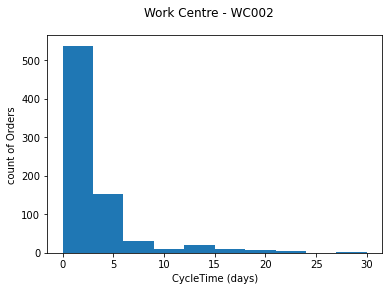

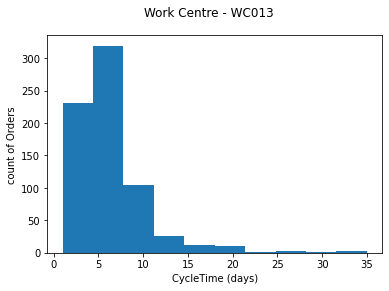

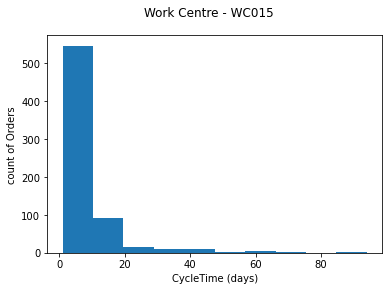

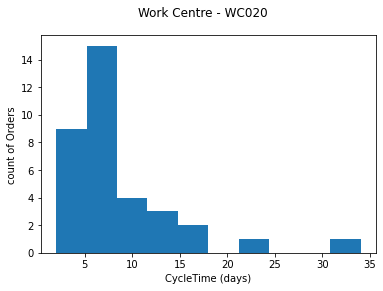

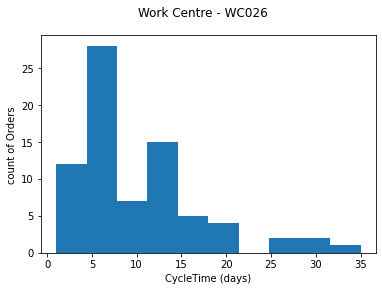

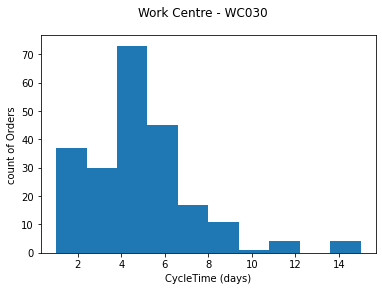

In [17]:
# Visualise data

# Histogram of focus work centres 
for WC in Focus_WC :
    Order_wc_Fpn = Order_wc[Order_wc['Work Centre'] == WC]
    plt.hist(Order_wc_Fpn['CycleTime'])
    plt.suptitle('Work Centre - ' + WC)
    plt.xlabel('CycleTime (days)')
    plt.ylabel('count of Orders')
    plt.show()

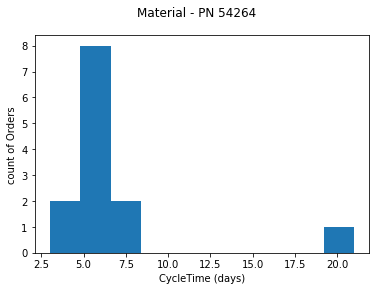

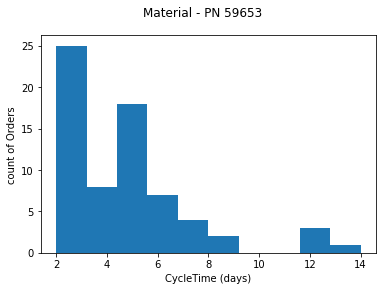

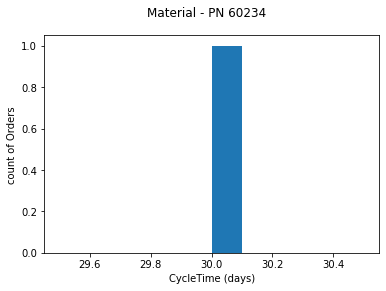

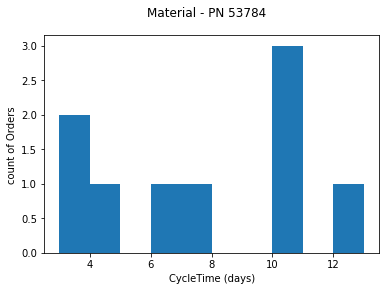

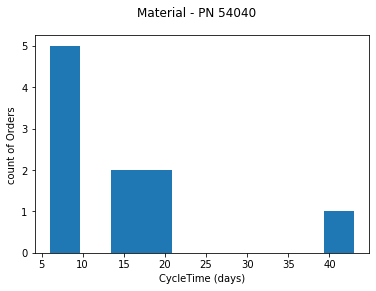

In [18]:
# # Histogram of focus parts 
for part in Focus_Part :
    Order_wc_Fpn = Order_wc[Order_wc['Material'] == part]
    plt.hist(Order_wc_Fpn['CycleTime'])
    plt.suptitle('Material - ' + part)
    plt.xlabel('CycleTime (days)')
    plt.ylabel('count of Orders')
    plt.show()

AxesSubplot(0.125,0.2;0.775x0.68)


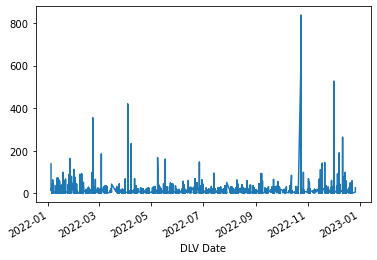

In [19]:
# Time-series 

Order_wc.set_index('DLV Date', inplace=True)
print(Order_wc['CycleTime'].plot())

AxesSubplot(0.125,0.125;0.775x0.755)


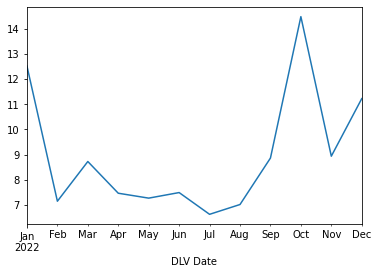

In [20]:
# Time-series by month
Order_wc_avg = Order_wc.resample('M').mean()
Order_wc_avg.index = Order_wc_avg.index.to_period('M')
Order_wc_avg.head()
print(Order_wc_avg['CycleTime'].plot())